# Customer churn prediction project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
#cf.go_offline()
#from plotly.offline import init_notebook_mode, iplot, download_plotlyjs, plot
#cf.go_offline()
#init_notebook_mode(connected=True)

## The dataset
The dataset collected the data of customer labelled Churn (1) or Retain (0) with some features.

## Data exploration

In [ ]:
#The path of the dataset
path = 'https://raw.githubusercontent.com/IsaTran21/Links/main/telecom_churn.csv'

In [ ]:
#Read the csv file
df = pd.read_csv(path)

In [ ]:
#To see the dataframe (the first 3 rows)
df.head(3)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [ ]:
#Check the shape of the dataframe
df.shape

(5000, 21)

In [ ]:
#Check the dataframe columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [ ]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [ ]:
#What is the maximum and averate daily minutes?
max_daily_minutes = df['total_day_minutes'].max()
averate_daily_minutes = df['total_day_minutes'].mean()
print(f'The maxium daily minutes is {max_daily_minutes} \n\
The averate daily minute is {averate_daily_minutes}')

The maxium daily minutes is 351.5 
The averate daily minute is 180.2889


In [ ]:
#Descriptive statistics
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Data visualization

In [ ]:
import plotly.graph_objects as go

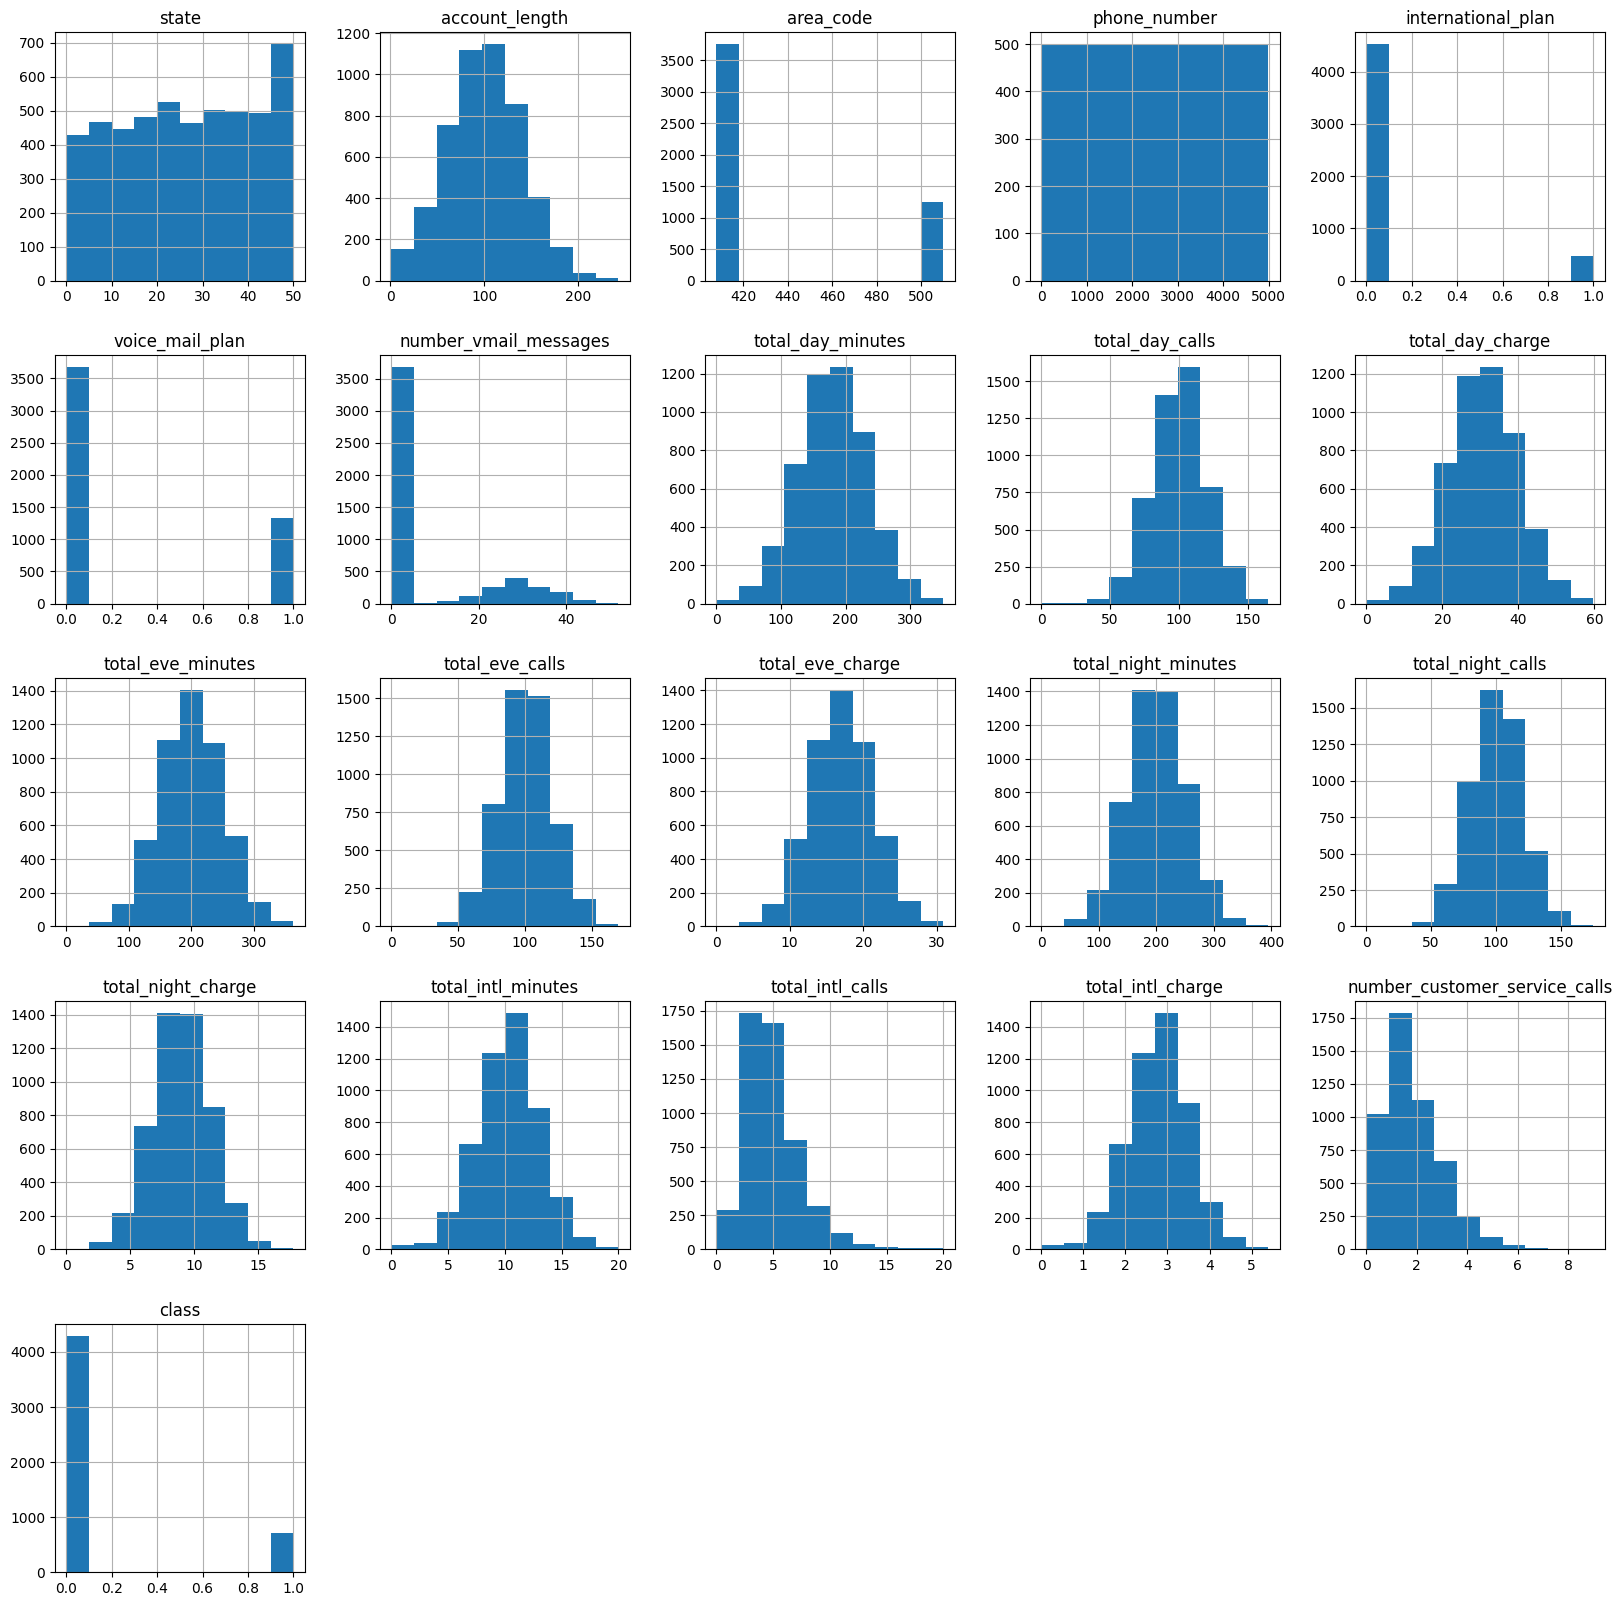

In [ ]:
#Histogram for all features
#To see the distributions of all the features
df.hist(figsize=(20,20))
plt.show()

In [ ]:
val = df['class'].value_counts()

In [ ]:
#!pip install --upgrade plotly
#!pip install --upgrade notebook

In [ ]:
import plotly.graph_objects as go
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = go.Figure(data=[go.Pie(labels=['Retained (0)','Exited (1)'], values=val)])
fig.show(renderer="colab")

In [ ]:
#The histogram

fig = px.histogram(df, x='international_plan',
                   color='class',
                   width=600,height=400)
fig.show(renderer='colab')

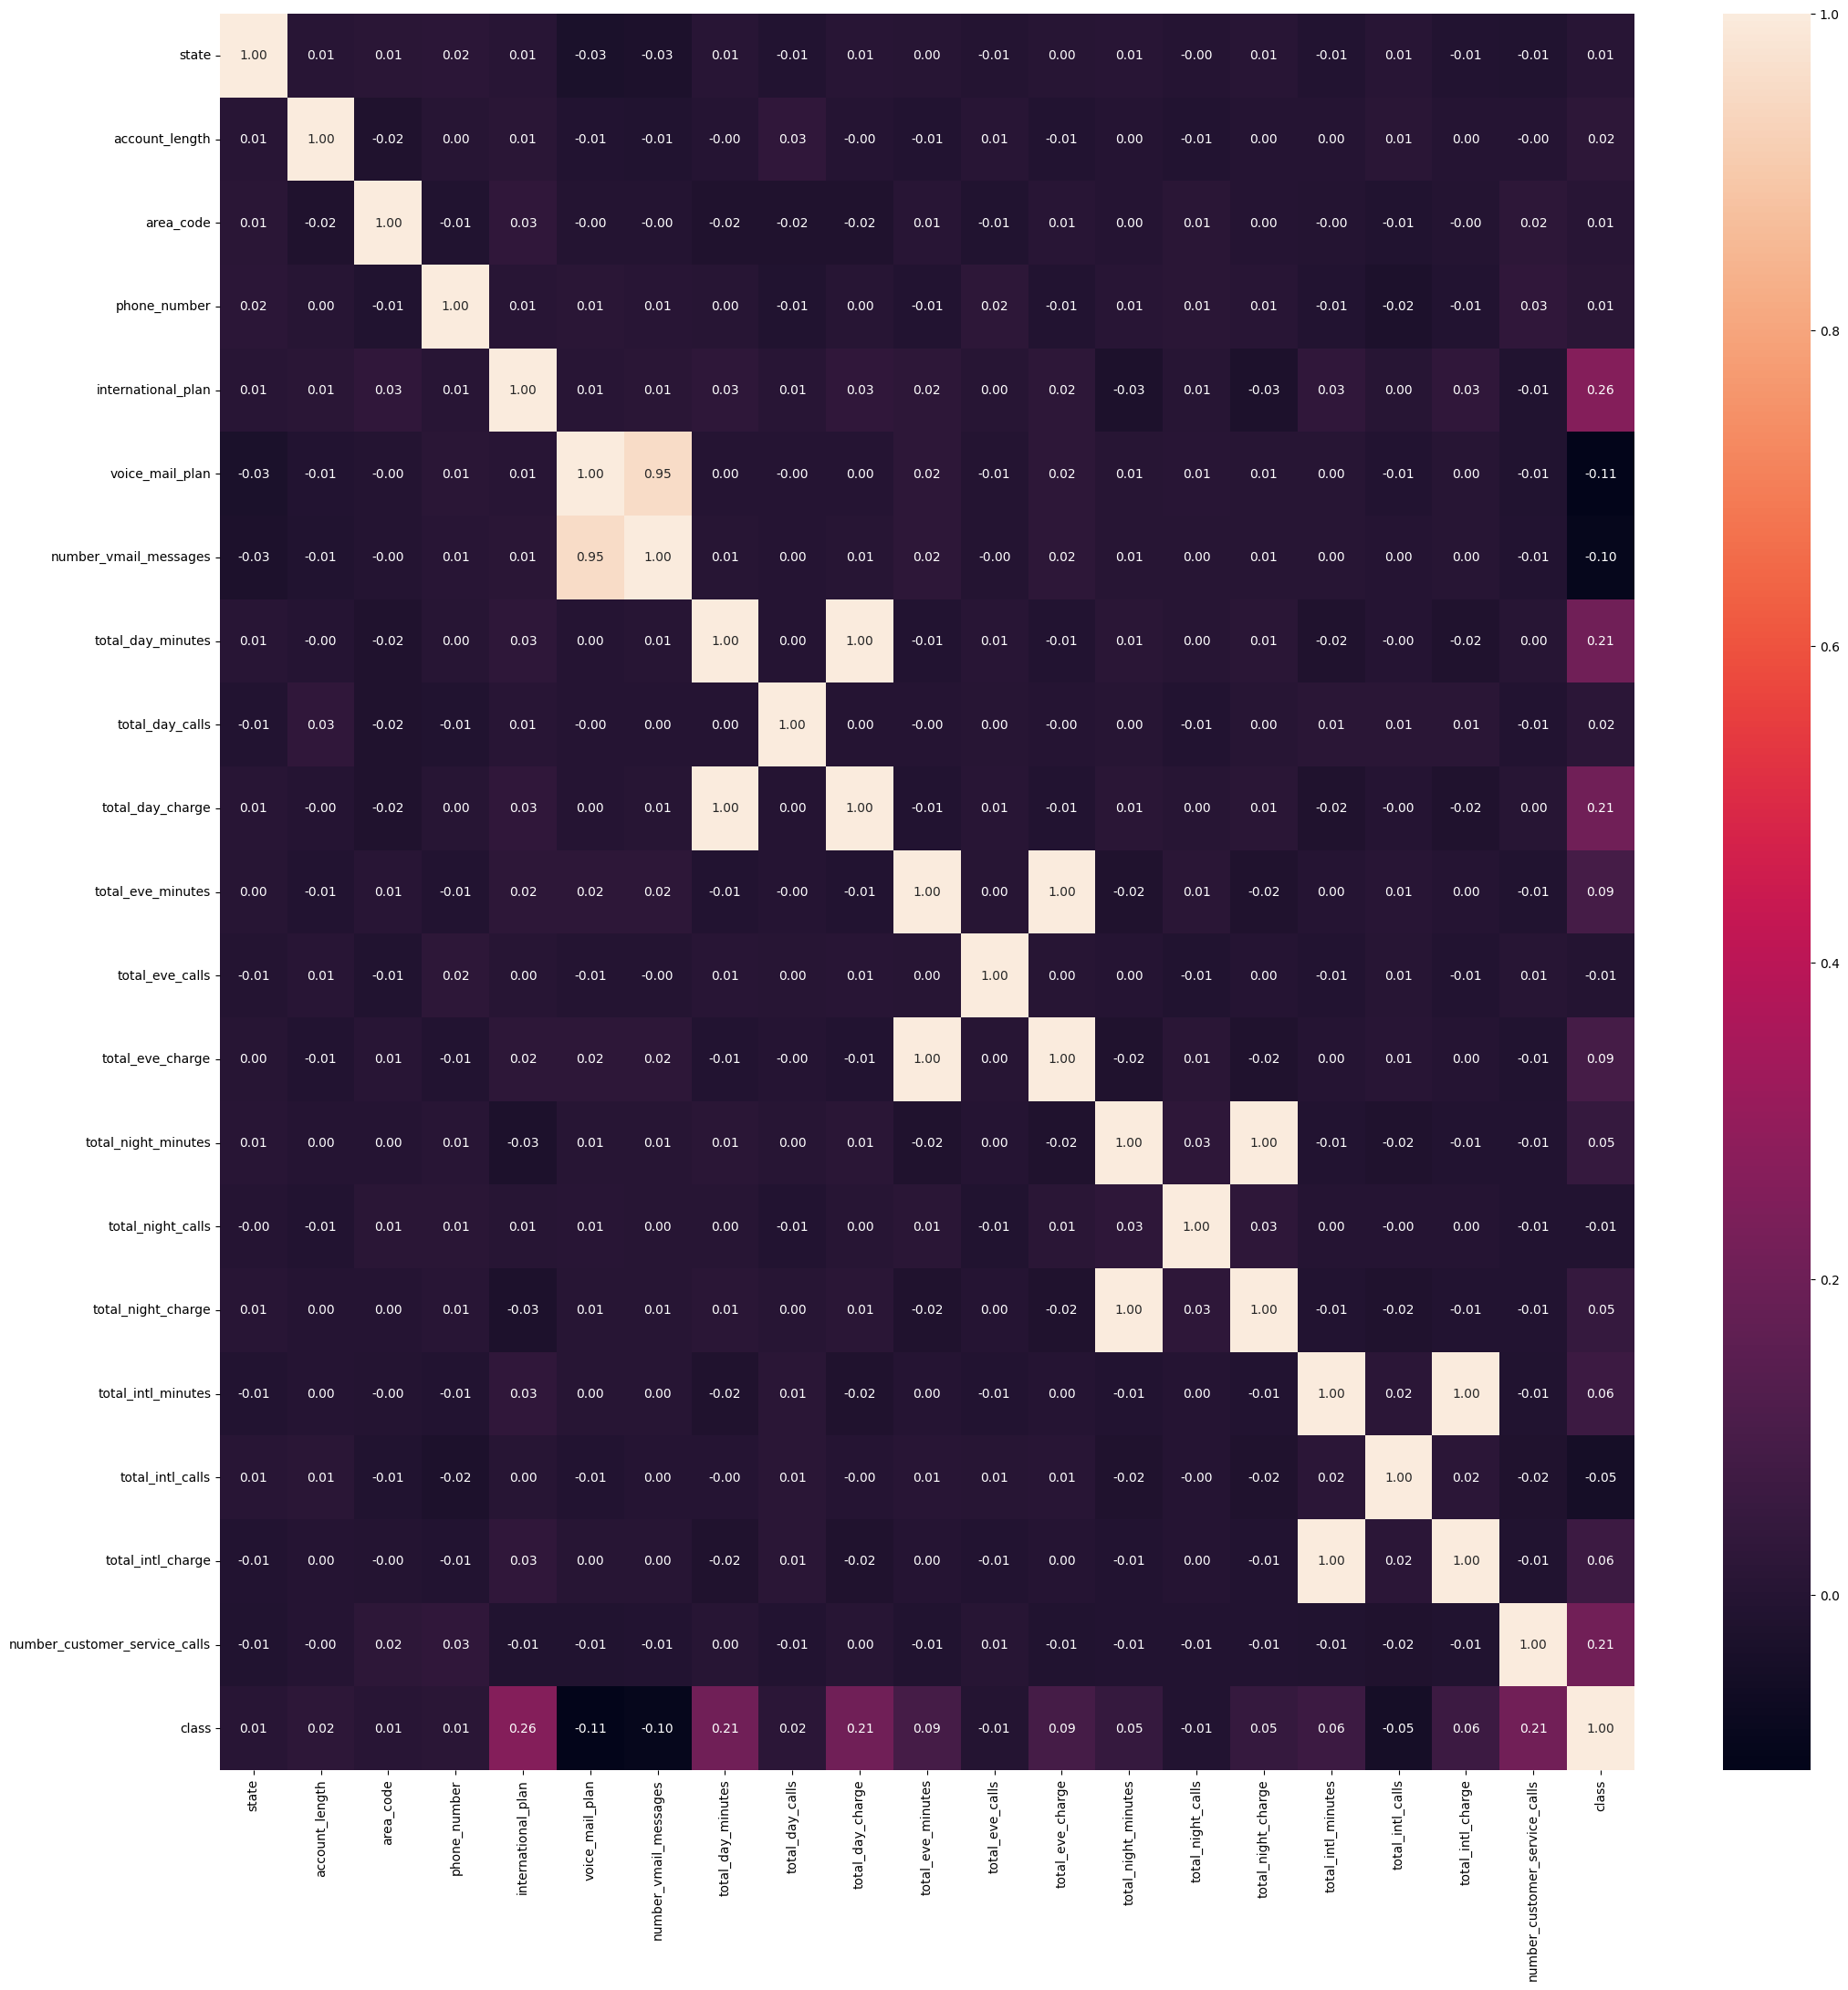

In [ ]:
# Correlation matrix
plt.figure(figsize=(25, 25))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f')

#plt.title("Correlation matrix for customers", fontsize=30)
plt.show()

<ipython-input-250-677919180667>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-250-677919180667>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Distribution of day charges by churn')

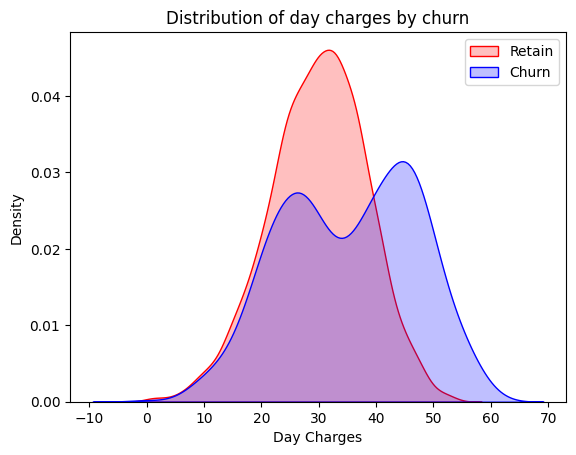

In [ ]:
# Plot the kde

class_0 = df["total_day_charge"][df[["total_day_charge", "class"]]["class"]==0]
class_1 = df["total_day_charge"][df[["total_day_charge", "class"]]["class"]==1]
ax = sns.kdeplot(class_0, color='Red', shade=True)
ax = sns.kdeplot(class_1, color='Blue', shade=True)
ax.legend(["Retain", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Day Charges')
ax.set_title("Distribution of day charges by churn")

In [ ]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [ ]:
# The voice mail plan in terms of classes
#The histogram
fig = px.histogram(df, x='voice_mail_plan',
                   color='class',
                   width=600,height=400)
fig.show(renderer='colab')

## Identify feature importantce and prepare the data before model training

In [ ]:
# drop the uneccessary features
X = df.drop(["class", "area_code", "phone_number"], axis="columns")
y = df["class"]

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [ ]:
X.shape

(5000, 18)

In [ ]:
#Check the shape of y
y.shape

(5000,)

In [ ]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2001)


In [ ]:
#To check the shape of the X_train, X_test, y_train, y_test
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_train is {X_test.shape}')
print(f'The shape of X_train is {y_test.shape}')
print(f'The shape of X_train is {y_train.shape}')

The shape of X_train is (4000, 18)
The shape of X_train is (1000, 18)
The shape of X_train is (1000,)
The shape of X_train is (4000,)


In [ ]:
# Plot the feature importance
feat_scores = pd.DataFrame()

## Feature importance
There are various methods to calculate feature importance, and the choice of method often depends on the specific algorithm or model being used. Some common methods for calculating feature importance include:

*** Random Forest Feature Importance: In Random Forest models, feature importance is computed based on the decrease in impurity (e.g., Gini impurity) that each feature causes when used to split the data in the tree-building process. Features that result in a significant reduction in impurity are considered more important ***.

Gradient Boosting Feature Importance: Gradient Boosting algorithms like XGBoost, LightGBM, and CatBoost also compute feature importance. They measure the contribution of each feature to the reduction in the loss function as trees are added to the ensemble.

Permutation Importance: Permutation importance is a model-agnostic method that works by shuffling the values of a single feature and observing how it affects the model's performance. Features that, when shuffled, lead to a significant drop in performance are considered more important.

Lasso Regression (L1 Regularization) Coefficients: In linear models with L1 regularization (Lasso regression), feature importance can be determined by the magnitude of the coefficients assigned to each feature. Features with non-zero coefficients are considered important.

Recursive Feature Elimination (RFE): RFE is a technique that iteratively removes the least important features from the model and measures how it impacts model performance. Features that result in the largest performance drop when removed are considered important.

Tree-based models (e.g., Decision Trees): In decision tree-based models, features that appear closer to the root of the tree or higher up in the tree tend to be more important, as they have a greater influence on the final decision.

Feature importance is valuable for several purposes:

Feature Selection: You can use feature importance scores to identify and select the most relevant features for your model, improving model performance and reducing overfitting.

Model Interpretability: Understanding feature importance helps interpret the model's behavior and can be useful for explaining predictions to stakeholders.

Data Understanding: It provides insights into which variables are driving the model's decisions, which can be crucial for domain understanding.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

### Random Forest Feature Importance
Random Forest Feature Importance: In Random Forest models, feature importance is computed based on the decrease in impurity (e.g., Gini impurity) that each feature causes when used to split the data in the tree-building process. Features that result in a significant reduction in impurity are considered more important.*italicized text*

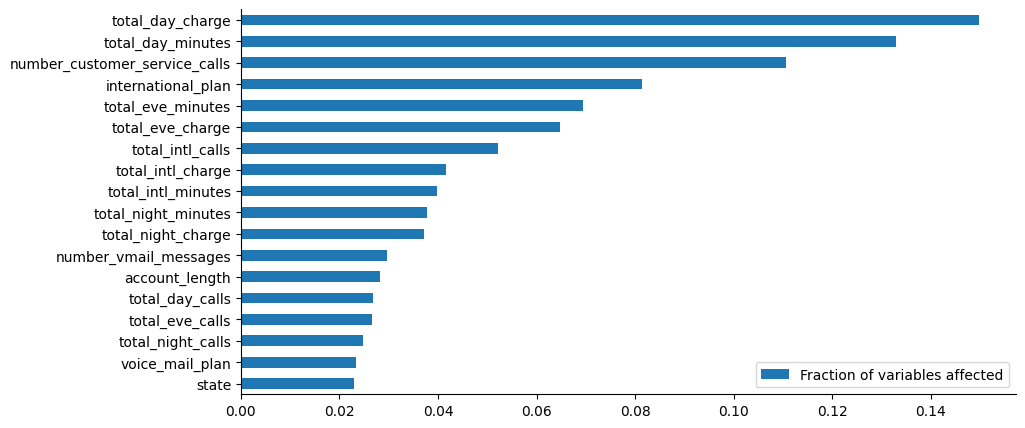

In [ ]:
# Plot the feature importance
# To see which variables affect the output the most
feat_scores = pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind='barh', figsize=(10, 5))
sns.despine()

## Models
1. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       863
           1       0.54      0.11      0.18       137

    accuracy                           0.86      1000
   macro avg       0.71      0.55      0.55      1000
weighted avg       0.83      0.86      0.82      1000



### The confusion matrix
Based

### Comment
The true negative is 795. The false positive (not positive but predicted positive => false positive is 68). The false negative is 53. And true positive is 84.

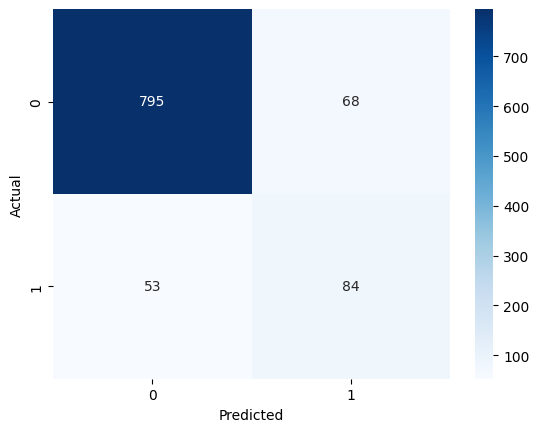

In [ ]:
# Create a heatmap of the confusion matrix with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()

## TRAIN AND EVALUATE A SUPPORT VECTOR MACHIEN CLASSIFIER

CalibratedClassifierCV is a class in scikit-learn (sklearn) that is used for probability calibration of classifiers. It is a powerful tool when you need well-calibrated probability estimates from your classifier, especially for binary classification problems. Here's a more detailed explanation of CalibratedClassifierCV:

In many machine learning classification models, the output is not just the predicted class labels but also associated probability estimates. These probabilities indicate the likelihood or confidence that a given sample belongs to a particular class. For binary classification, these probabilities are typically in the range [0, 1], and a threshold is applied to convert them into class labels (e.g., 0 or 1).

However, not all classifiers provide well-calibrated probability estimates. In other words, the predicted probabilities may not accurately reflect the true likelihood of a sample belonging to a class. For example, a classifier may be overly confident in its predictions, assigning probabilities close to 0 or 1 when it shouldn't, or it might underestimate the confidence.

CalibratedClassifierCV is designed to address this issue. It works by fitting an additional calibration model on top of an existing classifier. This calibration model learns to adjust the predicted probabilities, making them more accurate and better aligned with the true probabilities. The calibration model essentially acts as a post-processing step that corrects the raw probability outputs of the underlying classifier.

Here's how CalibratedClassifierCV typically works:

You start with an existing classifier that you want to calibrate. This classifier could be any classifier supported by scikit-learn, such as a support vector machine (SVM), random forest, logistic regression, or others.

You create an instance of CalibratedClassifierCV and pass your existing classifier as an argument.

CalibratedClassifierCV uses cross-validation to train the calibration model on a separate calibration dataset. This calibration dataset is usually a portion of the original training data that was not used for training the base classifier.

After calibration, when you make predictions using the calibrated classifier, it provides well-calibrated probability estimates.

You can then use these calibrated probabilities for various purposes, such as ranking, thresholding, or making informed decisions based on confidence scores.

CalibratedClassifierCV supports two common methods for calibration: sigmoid and isotonic. The sigmoid calibration is a parametric method that uses a logistic function to adjust the probabilities, while the isotonic calibration is a non-parametric method that uses isotonic regression.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV #For probability score output
from sklearn.svm import LinearSVC

In [ ]:
model_svm = LinearSVC(max_iter = 10000)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(max_iter=10000)

In [ ]:
y_pred = model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       863
           1       0.50      0.16      0.24       137

    accuracy                           0.86      1000
   macro avg       0.69      0.57      0.58      1000
weighted avg       0.83      0.86      0.83      1000



<Axes: >

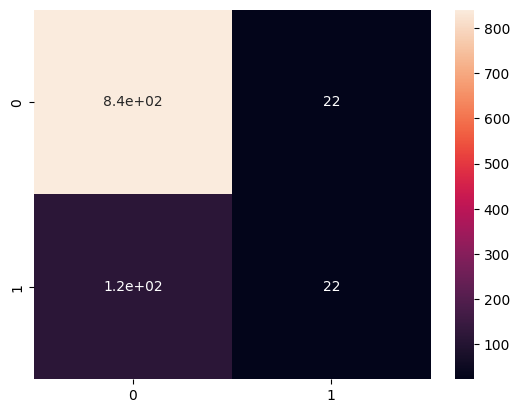

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
model_svm = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       863
           1       0.50      0.16      0.24       137

    accuracy                           0.86      1000
   macro avg       0.69      0.57      0.58      1000
weighted avg       0.83      0.86      0.83      1000



In [ ]:
y_pred = model_svm.predict(X_test)

<Axes: >

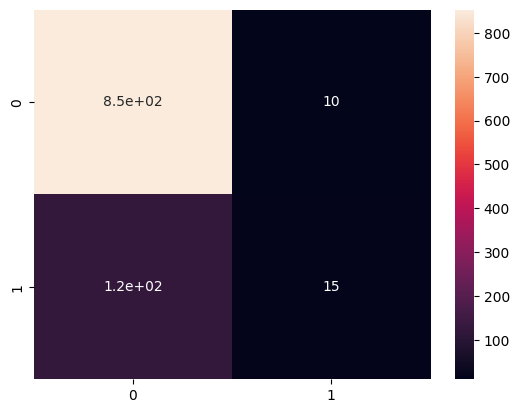

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

## TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

Random Forest classifer is atype of ensemble algorithm. It creates a set of decision trees from randomly selected subset of training set. It then combines votes from different decidsion trees to decide the final class of the test object.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       863
           1       0.92      0.78      0.85       137

    accuracy                           0.96      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.96      0.96      0.96      1000



<Axes: >

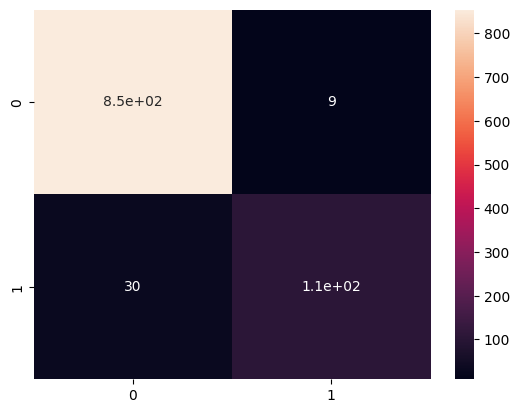

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Comment: the Random Forest performs much better than the above models.

## K NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model_knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       863
           1       0.66      0.33      0.44       137

    accuracy                           0.89      1000
   macro avg       0.78      0.65      0.69      1000
weighted avg       0.87      0.89      0.87      1000



## Comment
Precision: Precision measures the accuracy of positive predictions made by the model. For class "0," it's 0.90, which means that out of all the instances the model predicted as "0," 90% were actually "0." For class "1," it's 0.66, indicating that 66% of the instances predicted as "1" were actually "1."

Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all relevant instances. For class "0," it's 0.97, meaning that the model correctly identified 97% of all the "0" instances. For class "1," it's 0.33, indicating that the model only identified 33% of the "1" instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when you want to consider both false positives and false negatives. For class "0," the F1-score is 0.94, and for class "1," it's 0.44.

Support: Support represents the number of instances in each class in the test dataset. In your case, there are 863 instances of class "0" and 137 instances of class "1."

Accuracy: Accuracy is the overall performance of the model, measuring the percentage of correctly predicted instances in the entire dataset. In this case, the overall accuracy of the model is 0.89, which means it correctly predicted 89% of the instances.

Macro Average (macro avg): This row provides the average of precision, recall, and F1-score for both classes. It can give you an idea of the model's overall performance across classes.

Weighted Average (weighted avg): This row provides a weighted average of precision, recall, and F1-score for both classes, taking into account class imbalance. It's useful when there is an unequal distribution of classes in the dataset.

<Axes: >

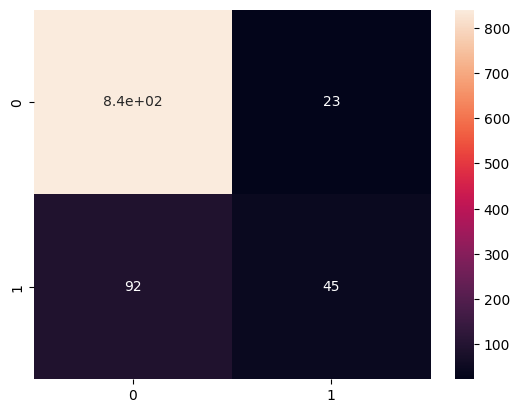

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       863
           1       0.55      0.61      0.58       137

    accuracy                           0.88      1000
   macro avg       0.75      0.77      0.76      1000
weighted avg       0.88      0.88      0.88      1000



<Axes: >

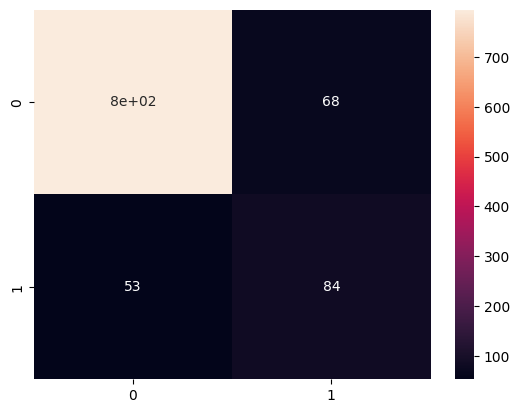

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

## The ROC and AUC

In [ ]:
# Demo
model_LR.predict_proba(X_test)[0:3, 0:3]


array([[0.81629891, 0.18370109],
       [0.87994394, 0.12005606],
       [0.85630122, 0.14369878]])

In [ ]:
model_LR.predict_proba(X_test)

array([[0.81629891, 0.18370109],
       [0.87994394, 0.12005606],
       [0.85630122, 0.14369878],
       ...,
       [0.86600069, 0.13399931],
       [0.91475187, 0.08524813],
       [0.9573954 , 0.0426046 ]])

In [296]:
#To get the second column
model_LR.predict_proba(X_test)[:,1][:5]#To get the 5 elements of the second column

array([0.18370109, 0.12005606, 0.14369878, 0.53409479, 0.04533589])

In [298]:
from sklearn.metrics import roc_curve

In [300]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])

In [301]:
fpr1

array([0.        , 0.        , 0.        , 0.0023175 , 0.0023175 ,
       0.00579374, 0.00579374, 0.00811124, 0.00811124, 0.01042874,
       0.01042874, 0.01390498, 0.01390498, 0.01506373, 0.01506373,
       0.01853998, 0.01853998, 0.01969873, 0.01969873, 0.02085747,
       0.02085747, 0.02896871, 0.02896871, 0.03012746, 0.03012746,
       0.03128621, 0.03128621, 0.03244496, 0.03244496, 0.03360371,
       0.03360371, 0.03707995, 0.03707995, 0.03939745, 0.03939745,
       0.0428737 , 0.0428737 , 0.04519119, 0.04519119, 0.04866744,
       0.04866744, 0.04982619, 0.04982619, 0.05098494, 0.05098494,
       0.05214368, 0.05214368, 0.05909618, 0.05909618, 0.06141367,
       0.06141367, 0.0787949 , 0.0787949 , 0.0834299 , 0.0834299 ,
       0.08574739, 0.08574739, 0.09385863, 0.09385863, 0.09849363,
       0.09849363, 0.10544612, 0.10544612, 0.11471611, 0.11471611,
       0.1193511 , 0.1193511 , 0.12050985, 0.12050985, 0.1216686 ,
       0.1216686 , 0.12514484, 0.12514484, 0.12630359, 0.12630

In [302]:
tpr1

array([0.        , 0.00729927, 0.04379562, 0.04379562, 0.05839416,
       0.05839416, 0.0729927 , 0.0729927 , 0.08759124, 0.08759124,
       0.09489051, 0.09489051, 0.10218978, 0.10218978, 0.10948905,
       0.10948905, 0.11678832, 0.11678832, 0.12408759, 0.12408759,
       0.13868613, 0.13868613, 0.15328467, 0.15328467, 0.16058394,
       0.16058394, 0.16788321, 0.16788321, 0.17518248, 0.17518248,
       0.20437956, 0.20437956, 0.21167883, 0.21167883, 0.22627737,
       0.22627737, 0.23357664, 0.23357664, 0.24087591, 0.24087591,
       0.24817518, 0.24817518, 0.25547445, 0.25547445, 0.27737226,
       0.27737226, 0.28467153, 0.28467153, 0.2919708 , 0.2919708 ,
       0.29927007, 0.29927007, 0.30656934, 0.30656934, 0.31386861,
       0.31386861, 0.32116788, 0.32116788, 0.32846715, 0.32846715,
       0.33576642, 0.33576642, 0.34306569, 0.34306569, 0.35766423,
       0.35766423, 0.3649635 , 0.3649635 , 0.37226277, 0.37226277,
       0.37956204, 0.37956204, 0.38686131, 0.38686131, 0.39416

In [303]:
thresh1

array([1.76678506, 0.76678506, 0.65067205, 0.6350177 , 0.62481932,
       0.58693579, 0.55999341, 0.55207012, 0.54544461, 0.53814879,
       0.53409479, 0.51930082, 0.51660729, 0.51218334, 0.50321917,
       0.47237199, 0.47113349, 0.46809205, 0.46732849, 0.46643507,
       0.46415472, 0.41436103, 0.40140183, 0.39877793, 0.39683185,
       0.393724  , 0.39260704, 0.38903611, 0.38539115, 0.37804634,
       0.36712837, 0.36334452, 0.36233897, 0.36130788, 0.35904536,
       0.35477711, 0.3538472 , 0.35188594, 0.35136534, 0.34550493,
       0.34533305, 0.34441502, 0.3364536 , 0.33491705, 0.32699234,
       0.32674605, 0.32640457, 0.3205317 , 0.31784939, 0.31328418,
       0.31155667, 0.28816008, 0.28814193, 0.28373165, 0.28351454,
       0.28033497, 0.27970456, 0.27333807, 0.27226704, 0.26932617,
       0.26317558, 0.25697834, 0.25647201, 0.25004259, 0.2486675 ,
       0.24243526, 0.24069636, 0.24016572, 0.24006809, 0.23967611,
       0.2394512 , 0.23432016, 0.23257614, 0.2314235 , 0.22944

In [311]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:,1], pos_label=1)

In [306]:
#AUC score
from sklearn.metrics import roc_auc_score

In [308]:
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:,1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:,1])

In [309]:
print('Logistic regerssion: ', auc_score1)
print('svm:  ', auc_score2)
print('Random Forest: ', auc_score3)
print('K-Nearest Neigbors: ', auc_score4)
print('Naive Bayes: ', auc_score5)

Logistic regerssion:  0.7456335478850725
svm:   0.8062775414231463
Random Forest:  0.9205580600688483
K-Nearest Neigbors:  0.6902842740059714
Naive Bayes:  0.8484830543596857


## A visualizing way to justify the performances of the classifiers

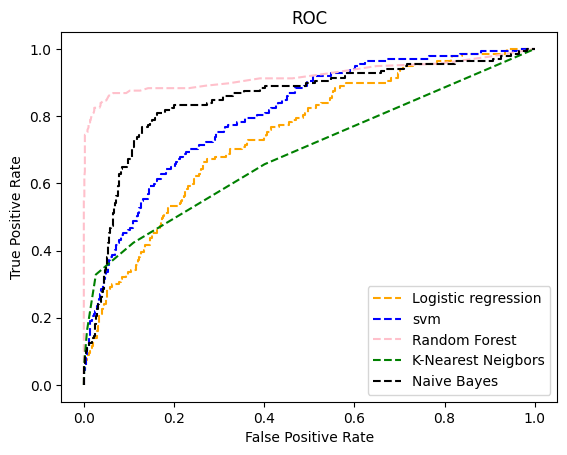

In [315]:
plt.plot(fpr1, tpr1, linestyle="--", color="orange", label="Logistic regression")
plt.plot(fpr2, tpr2, linestyle="--", color="blue", label="svm")
plt.plot(fpr3, tpr3, linestyle="--", color="pink", label="Random Forest")
plt.plot(fpr4, tpr4, linestyle="--", color="green", label="K-Nearest Neigbors")
plt.plot(fpr5, tpr5, linestyle="--", color="black", label="Naive Bayes")

plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc="best")
plt.show()

### Comment:
The pink line which is Random Forest produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

In [322]:
y_pred_rf = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       863
           1       0.54      0.11      0.18       137

    accuracy                           0.86      1000
   macro avg       0.71      0.55      0.55      1000
weighted avg       0.83      0.86      0.82      1000



In [327]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [335]:
# Calculate accuracy, precision, and recall for each class individually
test_accuracy_LR = model_LR.score(X_test, y_test)
precision = precision_score(y_test, y_pred_rf, average=None)
recall = recall_score(y_test, y_pred_rf, average=None)
print(f"Accuracy: {test_accuracy_LR*100:.2f}%")
# Print accuracy, precision, and recall for each class
for class_label, prec, rec in zip(["retain", "churn"], precision, recall):
    print(f"Class {class_label}:")
    print(f"  Precision: {prec*100:.2f}%")
    print(f"  Recall: {rec*100:.2f}%")

Accuracy: 86.50%
Class retain:
  Precision: 87.45%
  Recall: 98.49%
Class churn:
  Precision: 53.57%
  Recall: 10.95%


## Conclusion
Consider 1 is churned class and 0 is retained class.
Amongst all the trained models, Random Forest Classifer algorithm produced the highest Area under the ROC curve (AUC).
The following scores are the results of the Random Forest Classifier model
<ol>
<li>Accuracy: ~86% label accuracy</li>
<li>Precision: ~87% labelled as Retained customers and ~0.54 labelled as churned customer.</li>
<li>Recall: ~98% labelled as Retained customers and ~11% labelled as Churned customer.

</ol>

## Improving model using grid search
Because the Random Forest model performed the best, therefore, we are going to tune hyperparameters using grid search further.

## GRID SEARCH CV

In [317]:
from sklearn.model_selection import GridSearchCV

In [319]:
# Define a parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create GridSearchCV with the Random Forest classifier and parameter grid
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1)#n_jobs=-1 use all available CPU cores for parallel processing.

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (Random Forest classifier with the best hyperparameters)
best_rf_classifier = grid_search.best_estimator_#The best model

# Evaluate the best model on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy: 0.962


## Comment
After using grid search for tuning hyperparameters, we see that the test accuracy has improved tremendously from 86.5% to 96.2%